In [ ]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://youtu.be/hraKTseOuJA

"""
Dataset from here: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html
"""

'\nDataset from here: https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html\n'

In [1]:
!pip install -q kaggle

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [4]:
image_directory = 'DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/images/'

import kagglehub

#Download latest version
path = kagglehub.dataset_download("esterlita40/multilabel-objek-pensilpenapenghapustipex")

print("Path to dataset files:", path)

100%|██████████| 1.27G/1.27G [00:13<00:00, 99.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/esterlita40/multilabel-objek-pensilpenapenghapustipex/versions/1


In [5]:
import os
os.environ["KAGGLE_USERNAME"] = "esterlita40" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "5242e0cfdf515083b5e30587ba996f89" # Ganti dengan key yang ada di kaggle.json

In [6]:
!kaggle datasets download -d esterlita40/multilabel-objek-pensilpenapenghapustipex

Dataset URL: https://www.kaggle.com/datasets/esterlita40/multilabel-objek-pensilpenapenghapustipex
License(s): CC0-1.0
 99% 1.25G/1.27G [00:05<00:00, 240MB/s]
100% 1.27G/1.27G [00:06<00:00, 226MB/s]


In [7]:
# prompt: unzip file movie-classifier.zip

!unzip multilabel-objek-pensilpenapenghapustipex.zip


Archive:  multilabel-objek-pensilpenapenghapustipex.zip
  inflating: DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/2 objek/Gambar (1).jpg  
  inflating: DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/2 objek/Gambar (10).jpg  
  inflating: DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/2 objek/Gambar (100).jpg  
  inflating: DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/2 objek/Gambar (101).jpg  
  inflating: DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/2 objek/Gambar (102).jpg  
  inflating: DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/2 objek/Gambar (103).jpg  
  inflating

In [8]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('/content/traindataset_Esterlita_Gisela_Panekenan_202355202017.csv')
print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000]  #Loading only first 1000 datapoints for memory reasons
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

          id  pensil  pena  penghapus  tipe-x
0  Gambar001       1     1          0       0
1  Gambar002       1     1          0       0
2  Gambar003       1     1          0       0
3  Gambar004       1     1          0       0
4  Gambar005       1     1          0       0
Index(['id', 'pensil', 'pena', 'penghapus', 'tipe-x'], dtype='object')


In [12]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
from tqdm import tqdm

SIZE = 200
X_dataset = []
image_directory = '/content/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/'

# Menelusuri semua subfolder dan file di dalamnya
for root, dirs, files in os.walk(image_directory):
    for file in tqdm(files):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # hanya gambar
            img_path = os.path.join(root, file)
            try:
                img = image.load_img(img_path, target_size=(SIZE, SIZE, 3))
                img = image.img_to_array(img)
                img = img / 255.
                X_dataset.append(img)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

X = np.array(X_dataset)
print("Shape of dataset:", X.shape)


0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 109/109 [00:14<00:00,  7.67it/s]


Shape of dataset: (331, 200, 200, 3)


In [17]:
#
print(df['id'][50])  #gambar objek ke 50


Gambar051


In [19]:
print(df.iloc[50][1:])  # ambil semua label


pensil       1
pena         1
penghapus    0
tipe-x       0
Name: 50, dtype: object


In [25]:
#Id and Genre are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['id'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Input(shape=(SIZE, SIZE, 3)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins.

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat).

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 196, 196, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 47, 47, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,412 (2.68 MB)

 Trainable params: 701,060 (2.67 MB)

 Non-trainable params: 352 (1.38 KB)

In [47]:
from tensorflow.keras.metrics import AUC, Precision, Recall

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')]
)


In [48]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9536 - auc: 0.9999 - loss: 0.0128 - precision: 0.9929 - recall: 0.9953 - val_accuracy: 0.9500 - val_auc: 0.9551 - val_loss: 0.4684 - val_precision: 0.9582 - val_recall: 0.9322
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9139 - auc: 1.0000 - loss: 0.0101 - precision: 0.9929 - recall: 0.9991 - val_accuracy: 0.9700 - val_auc: 0.9554 - val_loss: 0.4355 - val_precision: 0.9490 - val_recall: 0.9458
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9626 - auc: 0.9978 - loss: 0.0249 - precision: 0.9930 - recall: 0.9926 - val_accuracy: 0.9600 - val_auc: 0.9562 - val_loss: 0.2821 - val_precision: 0.9349 - val_recall: 0.9729
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9363 - auc: 0.9995 - loss: 0.0159 - precision: 0.9986 - recall: 0.9963 - val_accuracy: 0.7900 - val_auc: 0.9373 - val_loss: 0.3740 - val_precision: 0.9140 - val_recall: 0.9729
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/s

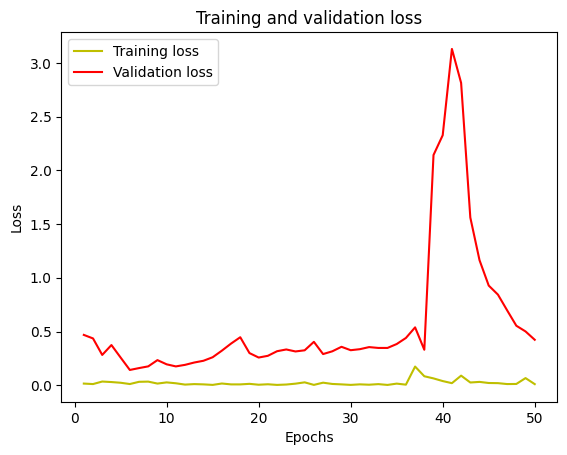

In [49]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

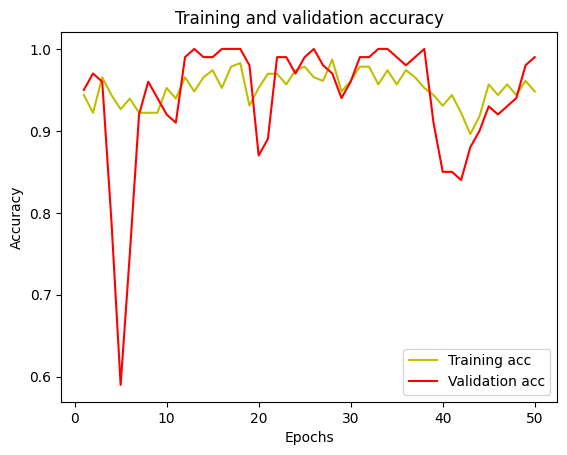

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


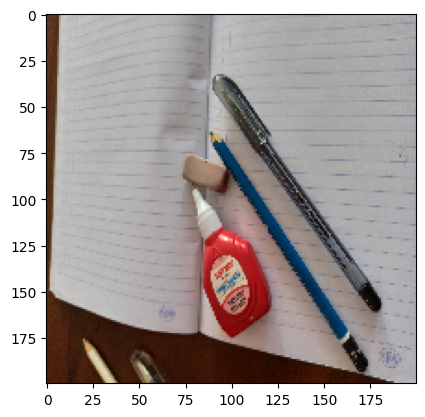

In [72]:
#Validate on an image
#img = image.load_img('/content/Multi_Label_dataset/Images/tt0085318.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/Multi_Label_dataset/Images/'
img = image.load_img('/content/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/DatasetMultilabel_Esterlita_Gisela_Panekenan_202355202017/4_objek/Gambar  (250).jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[1:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[::-1]  # Urutkan semua dari probabilitas tertinggi ke terendah


In [73]:
print(df.columns)
print(y.shape)


Index(['id', 'pensil', 'pena', 'penghapus', 'tipe-x'], dtype='object')
(331, 4)


In [74]:
#Print classes and corresponding probabilities
for i in range(len(sorted_categories)):
    print("{}".format(classes[sorted_categories[i]])+" ({:.4})".format(proba[0][sorted_categories[i]]))

tipe-x (1.0)
penghapus (1.0)
pena (1.0)
pensil (1.0)


In [76]:
###################################################

acc = model.evaluate(X_test, y_test)[1]
print(f"Accuracy: {acc*100:.2f}%")


################################################################

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9960 - auc: 0.9192 - loss: 0.4171 - precision: 0.9182 - recall: 0.9832 
Accuracy: 99.00%


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Predict probabilities
y_pred = model.predict(X_test)

# 2. Threshold probabilities to get binary labels
y_pred_classes = (y_pred > 0.5).astype(int)

# 3. Get class names (pastikan ini sesuai dengan urutan kolom label Anda)
classes = np.array(df.columns[1:])  # asumsi kolom ke-0 adalah id

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=classes))

# 5. Confusion Matrix untuk setiap label
print("\nConfusion Matrices:")
for i in range(len(classes)):
    print(f"\nConfusion Matrix for '{classes[i]}':")
    cm = confusion_matrix(y_test[:, i], y_pred_classes[:, i], labels=[0, 1])
    print(cm)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Classification Report:
              precision    recall  f1-score   support

      pensil       1.00      1.00      1.00       100
        pena       1.00      1.00      1.00       100
   penghapus       0.70      0.91      0.79        65
      tipe-x       1.00      1.00      1.00        30

   micro avg       0.92      0.98      0.95       295
   macro avg       0.93      0.98      0.95       295
weighted avg       0.93      0.98      0.95       295
 samples avg       0.92      0.98      0.94       295


Confusion Matrices:

Confusion Matrix for 'pensil':
[[  0   0]
 [  0 100]]

Confusion Matrix for 'pena':
[[  0   0]
 [  0 100]]

Confusion Matrix for 'penghapus':
[[10 25]
 [ 6 59]]

Confusion Matrix for 'tipe-x':
[[70  0]
 [ 0 30]]
